Demonstration of Data preprocessing in Python

A.Basic steps for data preprocessing

1. Importing libraries

In [1]:
# Importing Libraries:

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

2. importing and exploring dataset

In [2]:
# loading the data and setting the unique client_id as the index:

data1 = pd.read_csv('/content/Expanded_data_with_more_features.csv')
data2 = pd.read_csv('/content/loans.csv')
data3 = pd.read_csv('/content/mushrooms.csv')
data4 = pd.read_csv("/content/student.csv",header=0)
data5 = pd.read_csv("/content/mark.csv",header=0)

B.Main steps of preprocessing

1. Data Cleaning:

i. Handlling missing values in dataset

a. By removing missing values:

In [3]:
df = data1
#Finding the missing values in each column
df.isna().sum()

#Dropping/Deleting the rows containing the missing values.
datadrop = df.dropna()

#Checking to see the NA's after deletion of the rows.
datadrop.isna().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

b. Imputing Missing Data

In [4]:
df=data1
df.isna().sum()

#Calculate the mean of the NrSiblings column
sibl_mean = df.NrSiblings.mean()
print("Mean of NrSiblings column: ",sibl_mean)

#Impute the missing data in the NrSiblings column with the mean NrSiblings value
df.NrSiblings.fillna(sibl_mean,inplace=True)
df.isna().sum()

Mean of NrSiblings column:  2.1458942516082424


Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings                0
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Like NrSiblings, other missing values are handled by imputing the mean/median/mode of that column

2.Data Transformation

a. Simple encoding function

In [5]:
df = data2

df_categorical = df.select_dtypes(exclude=[np.number])


df_categorical.loan_type.replace({"home":1, "credit":2, "cash":3,"other":4}, inplace= True)
df_categorical.head()

,loan_type,loan_start,loan_end
0,1,2002-04-16,2003-12-20
1,2,2003-10-21,2005-07-17
2,1,2006-02-01,2007-07-05
3,3,2010-12-08,2013-05-05
4,2,2010-07-07,2012-05-21


b. Lable Encoding: Converting Categorical Data to Numerical Data Using Label Encoding

In [6]:
df=data2

df1 = df.dropna()

#Select all the columns that are not numeric using the following code:
data_column_category = df1.select_dtypes(exclude=[np.number]).columns
data_column_category

#import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

#Creating the object instance
label_encoder = LabelEncoder()

for i in data_column_category:

    df1[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df1.head()

Label Encoded Data: 


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,2,13672,0,10243,59,40,2.15
1,46109,1,9794,0,10984,107,101,1.25
2,46109,2,12734,1,10990,184,157,0.68
3,46109,0,12518,1,10596,303,313,1.24
4,46109,1,14049,1,11415,288,288,3.13


c. One-Hot Encoding: Converting Categorical Data to Numerical Data Using One-Hot Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df['loan_type'] = df['loan_type'].astype('category')


# Assigning numerical values and storing it in another columns
df['lon_new'] = df['loan_type'].cat.codes


# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(
    df[['lon_new']]).toarray())

# Merge with main
New_df = df.join(enc_data)

print(New_df)



     client_id loan_type  loan_amount  repaid  loan_id  loan_start  \
0        46109      home        13672       0    10243  2002-04-16   
1        46109    credit         9794       0    10984  2003-10-21   
2        46109      home        12734       1    10990  2006-02-01   
3        46109      cash        12518       1    10596  2010-12-08   
4        46109    credit        14049       1    11415  2010-07-07   
..         ...       ...          ...     ...      ...         ...   
438      26945     other        12963       0    10330  2001-11-26   
439      26945    credit         1728       1    10248  2004-01-27   
440      26945     other         9329       0    10154  2001-12-17   
441      26945      home         4197       0    10333  2003-10-16   
442      26945      home         3643       0    11434  2010-03-24   

       loan_end  rate  lon_new    0    1    2    3  
0    2003-12-20  2.15        2  0.0  0.0  1.0  0.0  
1    2005-07-17  1.25        1  0.0  1.0  0.0  0.0  


Here, OneHotEncoder returns SpiPy sparse matrix so converting to an array first enables us to save space when we have a huge number of categorical variables.

d.SQRT transformation

<ipython-input-8-fb0e56bdbb6a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'], ax=axes[0])
<ipython-input-8-fb0e56bdbb6a>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqrt_rate'], ax=axes[1])


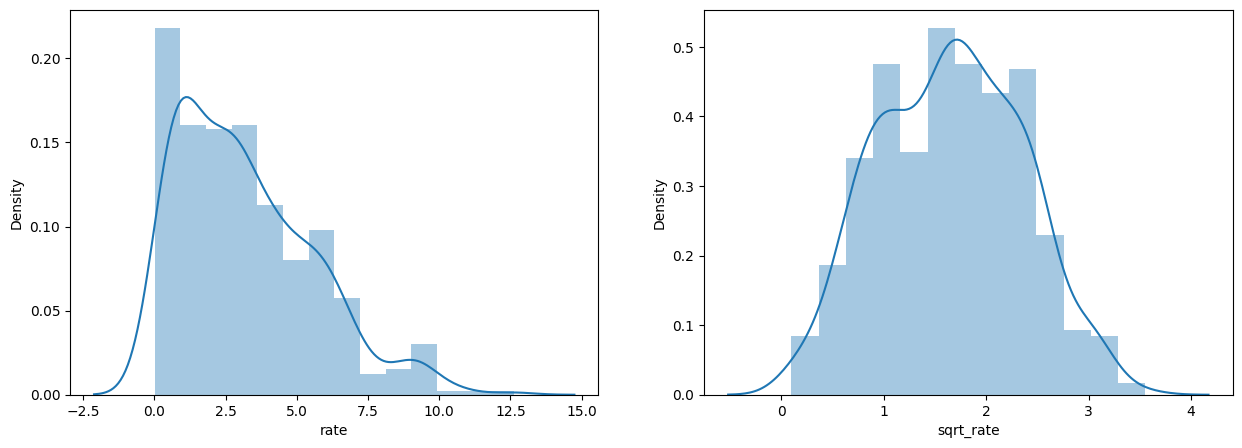

In [8]:
df = data2

df['SQRT_RATE'] = df['rate']**0.5
df['sqrt_rate'] = np.sqrt(df['rate'])
#df.head()

#checking the skewness, kurtosis between the original and transformed data:
#print("The skewness of the original data is {}".format(df.rate.skew()))
#print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
#print('')
#print("The kurtosis of the original data is {}".format(df.rate.kurt()))
#print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))

# plotting the distribution
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])
plt.show()

The Rate column was right skewed earlier. The skewness and kurtosis as reduced significantly. The transformed SQRT rate, on the right graph resembles normal distribution now.

e. Log Transformation

In [9]:
#For Distribution

#df['Log Rate'] = np.log(df['rate'])
#df.head()
#print("The skewnss of the LOG transformed data is {}".format(df['Log Rate'].skew()))
#print("The kurtosis of the LOG transformed data is {}".format(df['Log Rate'].kurt()))
# plot the graph:
#fig, axes = plt.subplots(1,3,figsize=(15,5))
#sns.distplot(df['rate'], ax=axes[0])
#sns.distplot(df['SQRT_RATE'], ax=axes[1])
#sns.distplot(df['Log Rate'], ax=axes[2])
#plt.show()
#In Distribution, Log Transformation made the rate left skewed and more peaked.However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data. Here, square root transformation is more suitable.

## Using Lambda function :
df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,lon_new,SQRT_RATE,sqrt_rate,LOG_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2,1.466288,1.466288,0.765468
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1,1.118034,1.118034,0.223144
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2,0.824621,0.824621,-0.385662
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,0,1.113553,1.113553,0.215111
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1,1.769181,1.769181,1.141033


f.Normalization

i. Min-Max Normalization:

In [10]:
df=data2

# ForeRate:
#min_rate = df.rate.min()
#min_rate
#max_rate = df.rate.max()
#max_rate
#df['Min_Max_R'] = (df['rate'] - min_rate)/ (max_rate - min_rate)
# checking if the skewness and kurtosis post scaling or not:
# For Rate:
#print("The skewness for the original data is {}.".format(df.rate.skew()))
#print("The skewness for the Min Max Scaled Data is {}.".format(df.Min_Max_R.skew()))
#print('')
#print("The kurtosis for the original data is {}.".format(df.rate.kurt()))
#print("The kurtosis for the Min Max Scaled Data is {}.".format(df.Min_Max_R.kurt()))
# Distribution of the columns
# For Rate
#fig, axes = plt.subplots(1,2, figsize=(15,5))
#sns.distplot(df['rate'], ax=axes[0])
#sns.distplot(df['Min_Max_R'], ax=axes[1])
#plt.tight_layout()
#plt.show()

# For Loan_amount:
#min_LA = df.loan_amount.min()
#min_LA
#max_LA = df.loan_amount.max()
#max_LA
#df['Min_Max_LA'] = (df['loan_amount'] - min_LA)/ (max_LA - min_LA)
# checking if the skewness and kurtosis post scaling or not:
# For Rate:
#print("The skewness for the original data is {}.".format(df.loan_amount.skew()))
#print("The skewness for the Min Max Scaled Data is {}.".format(df.Min_Max_LA.skew()))
#print('')
#print("The kurtosis for the original data is {}.".format(df.loan_amount.kurt()))
#print("The kurtosis for the Min Max Scaled Data is {}.".format(df.Min_Max_LA.kurt()))
# Distribution of the columns
# For Loan_Amount
#fig, axes = plt.subplots(1,2, figsize=(15,5))
#sns.distplot(df['loan_amount'], ax=axes[0])
#sns.distplot(df['Min_Max_LA'], ax=axes[1])
#3plt.tight_layout()
#plt.show()

df_num = df[['loan_amount','rate']]
#By SKlearn
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()
MinMaxScaled = MS.fit_transform(df_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

ii.Standardization(Z-Scor)

In [11]:
#distribution of Z-Score Normalization:

# for Rate :
#avg_rate = df['rate'].mean()
#avg_rate
#std_rate
# Step 1 : transform using Z-score
#df.head()
# checking if the skewness and kurtosis post scaling or not:
# For Rate:
#print('')
#print("The skewness for the Zscore Scaled column is {}.".format(df.Z_Score_Rate.skew()))
#print("The kurtosis for the Zscore Scaled columns is {}.".format(df.Z_Score_Rate.kurt()))
# For Loan_amount:
#avg_LA = df['loan_amount'].mean()
#avg_LA
#td_LA = df['loan_amount'].std()
#std_LA
# Step 1 : transform using Z-score
#df['Z_Score_LA'] = (df['loan_amount'] - avg_LA)/std_LA
#df.head()
# checking if the skewness and kurtosis post scaling or not:
# For Loan_amount:
#print("The skewness for the original data is {}.".format(df.loan_amount.skew()))
#print("The kurtosis for the original data is {}.".format(df.loan_amount.kurt()))
#print("")
#print("The skewness for the Zscore Scaled column is {}.".format(df.Z_Score_LA.skew()))
#print("The kurtosis for the Zscore Scaled columns is {}.".format(df.Z_Score_LA.kurt()))
# Distribution of the columns
#fig, axes = plt.subplots(2,2, figsize=(15,5))
#sns.distplot(df['rate'], ax=axes[0,0])
#sns.distplot(df['Z_Score_Rate'], ax=axes[0,1])
#sns.distplot(df['loan_amount'], ax=axes[1,0])
#sns.distplot(df['Z_Score_LA'], ax=axes[1,1])
#plt.show()

#By using SKlearn:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scaled_x = SS.fit_transform(df_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

3. Data Reduction

Dimensionality reduction can be used to simplify the features fed into the machine learning classifier. The most common methods used to carry out dimensionality reduction for supervised learning problems is Linear Principle component analysis(PCA), and it can be utilized to predict new cases.

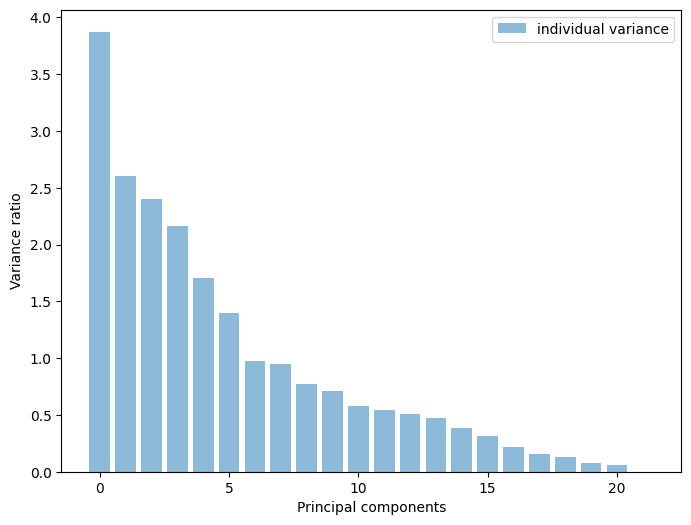

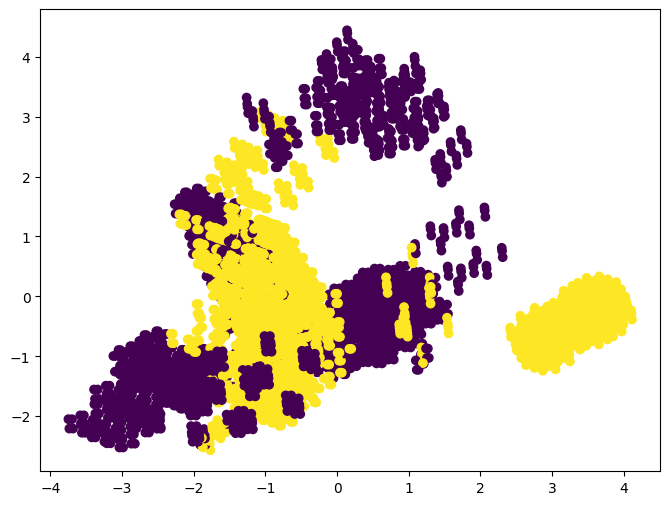

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

m_data = data3

# Machine learning systems work with integers, we need to encode these
# string characters into ints
encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:,1:23]
y_label = m_data.iloc[:, 0]

# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

#plot a scatter plot of the data point classification based on these 17 features:
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)
plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=m_data['class'])
plt.show()

4. Data Integration

Data Alignment and Merging: Align data from different sources based on common keys or columns and merge them into a single data frame.

In [13]:
student = data4
#student.head()
mark = data5
#mark.head()
df_merge = pd.merge(student,mark, on = 'Student_id')
df_merge.head()

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
